### TW6: Simple Linear Regression on COVID-19 Datasets


### Learning simple linear regression

Task 0: First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

Task 1: Apply a simple linear regression and a logistic regression on COVID-19 dataset(s). 

Task 2: A summary of your findings from simple regression modeling. 

#### Write full names of your team members who worked together.




#### Submission:

- Trivikram Peddiraju

- Shivaram Muppidi

###  Simple Linear Regression example

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

### Data Preparation

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [4]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

#### Load the data into a DataFrame

In [6]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#### A function to select the data and visualize it

In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

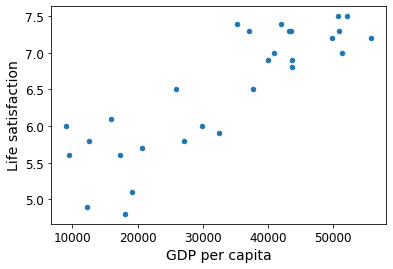

In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
# check sahpes of X and y
print(X.shape, y.shape)

(29, 1) (29, 1)


In [10]:
# check data values
print(X[:5])
print(y[:5])

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]]
[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]]


### Build a simple regression model


#### Create a simple linear regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
# import model
from sklearn.linear_model import LinearRegression


# Create a simple linear regression model
model = LinearRegression()

# Train the model
# This time we use all data for training
# Later (always in our analysis) we will divide the data into training data and testing data
model.fit(X, y)

LinearRegression()

In [12]:
# check the properties of the model
# coefficient and intercept

print(model.coef_)
print(model.intercept_)

[[4.91154459e-05]]
[4.8530528]


#### Predict y for a new X value

In [13]:
# Make a prediction for Cyprus 
# new data value 22587 for Cyprus's GDP per capita

X_new = [[22587]]

y_predict = model.predict(X_new)

y_predict

array([[5.96242338]])

#### Plot a scatter graph together with the regression function

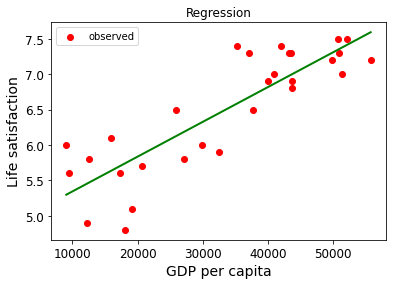

In [14]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')

# plot the regression together with the data
plt.plot(X,model.predict(X),c='g',label='fitted',linewidth=2)

plt.show()

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

See more details: https://scikit-learn.org/stable/modules/model_evaluation.html


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


### The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"


### Model Evaluation Example

#### 1. Preparing X and y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

See more details about Pandas Series and Numpy

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 2. Splitting X and y into training and testing sets

We are using the same data that is stored X, y above. 

In [15]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

#### 3. Linear regression in scikit-learn

In [16]:
# import model
from sklearn.linear_model import LinearRegression


# instantiate a simple linear regression model 
linreg=LinearRegression()

# fit the model to the training data (learn the coefficients)

linreg.fit(X_train,y_train)

LinearRegression()

#### 4. Making predictions for testing data

Use X_test

In [17]:
# make predictions on the testing set
y_pred=linreg.predict(X_test)

y_pred

array([[6.59031623],
       [6.90629497],
       [6.82350342],
       [6.90057464],
       [7.24870458],
       [6.88774681],
       [5.42891846],
       [6.12434396],
       [7.19687366]])

#### 5. Computing the RMSE 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [18]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.39596209321120784

#### 6. K Cross Validation and Learning Curve

In [19]:
import statistics as st
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=3, random_state=None, shuffle=True)


##### Setting up a testbed using KFold 

In [20]:
# Let's create a new simple linear regressor
linreg=LinearRegression()

# Conduct 3-fold cross validation
rmse=[]
r2 =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    r2.append(metrics.r2_score(y_test,y_pred))
    

print(rmse)
print(r2)

[0.4965975554576044, 0.381130571480563, 0.4401411215536226]
[0.686088171987693, 0.7712072570214199, 0.56652870835688]


#### Learning Curve

Check the details for learning curve

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

In [21]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and
# retrieve the information of model performance. 
train_sizes = np.linspace(0.2,0.8,5)  # 5 times 5*3 = 15

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                            train_sizes = train_sizes, 
                            scoring = 'neg_mean_squared_error',
                                                 cv=3, shuffle=True)
train_scores = np.sqrt(np.abs(train_mse))

test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores) 

train_scores_mean=np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

[[0.2157424  0.38723957 0.19123809]
 [0.33166809 0.36729099 0.3617635 ]
 [0.38744018 0.34697178 0.41153107]
 [0.35912163 0.32012734 0.44863398]
 [0.33946627 0.31855722 0.49925588]]
[[1.54771331 1.99479848 0.81716272]
 [0.5694152  0.46483732 0.95809601]
 [0.52998929 0.45280154 0.86212787]
 [0.53247457 0.44993075 0.49350627]
 [0.53639064 0.46329028 0.36532401]]


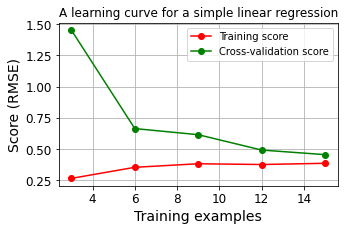

In [22]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Teamwork


###  Part 1: Regression Modeling

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Check your work in TW3 (EDA on COVID-19 datasets). In TW3, you conducted an EDA on your selected COVID-19 datasets through descriptive statistics and data visualization. The EDA analysis results may give you  insight of the selected data and relationships among the data attributes. 

2. Now, build a simple regression and plot the regression function with a scatter plot (as shown in the example above). 
    --> You may see the data does not follow a simple linear function. 
   
3. Build a logistic regression and draw a scatter plot of the data together with the logistic regression function. See the web resources below:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 

In [23]:
import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)

for filename in ("time_series_covid19_confirmed_US.csv","time_series_covid19_deaths_US.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [24]:
# import necessary packages and modules

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# read data
df = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22,11/2/22,11/3/22,11/4/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18480,18511,18511,18511,18511,18511,18511,18511,18511,18511
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65895,65973,65973,65973,65973,65973,65973,65973,65973,65973
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6926,6930,6930,6930,6930,6930,6930,6930,6930,6930
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7560,7575,7575,7575,7575,7575,7575,7575,7575,7575
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17286,17320,17320,17320,17320,17320,17320,17320,17320,17320


In [26]:
# Select the data for Washington and Texas
st1 = df.loc[df["Province_State"] == "Washington"]
st2 = df.loc[df["Province_State"] == "Texas"]

# drop not-used columns 
drop_cols = ['UID', 'iso2', 'iso3', 'FIPS', 'Province_State', 'Country_Region', 
             'Lat', 'Long_', 'code3', 'Combined_Key', 'Admin2']

st1 = st1.drop(columns=drop_cols)
st2 = st2.drop(columns=drop_cols)

print(st1.head())
print(st2.head())

st1.columns

      1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
3145        0        0        0        0        0        0        0        0   
3146        0        0        0        0        0        0        0        0   
3147        0        0        0        0        0        0        0        0   
3148        0        0        0        0        0        0        0        0   
3149        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  10/26/22  10/27/22  10/28/22  10/29/22  10/30/22  \
3145        0        0  ...      5537      5537      5537      5537      5537   
3146        0        0  ...      5223      5223      5223      5223      5223   
3147        0        0  ...     60006     60006     60006     60006     60006   
3148        0        0  ...     23425     23425     23425     23425     23425   
3149        0        0  ...     14968     14968     14968     14968     14968   

      10/31/22  11/1/22  11/2/22

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/26/22', '10/27/22', '10/28/22', '10/29/22', '10/30/22', '10/31/22',
       '11/1/22', '11/2/22', '11/3/22', '11/4/22'],
      dtype='object', length=1018)

In [27]:
# sum of column data of rows 
# columns and rows will be changed
# sum() function returns a Series
cases_st1 = st1.sum(axis=0)
cases_st2 = st2.sum(axis=0)

print(cases_st1.tail())
print(cases_st2.tail())

10/31/22    1838206
11/1/22     1838206
11/2/22     1839317
11/3/22     1839317
11/4/22     1839317
dtype: int64
10/31/22    8039843
11/1/22     8040256
11/2/22     8043407
11/3/22     8043873
11/4/22     8047691
dtype: int64


In [28]:
# createa a DataFrame of two states' data
dict_states = {'WA_cases': cases_st1, 'TX_cases': cases_st2}

data = pd.DataFrame(dict_states)

print(data.head())
print(data.tail())

         WA_cases  TX_cases
1/22/20         1         0
1/23/20         1         0
1/24/20         1         0
1/25/20         1         0
1/26/20         1         0
          WA_cases  TX_cases
10/31/22   1838206   8039843
11/1/22    1838206   8040256
11/2/22    1839317   8043407
11/3/22    1839317   8043873
11/4/22    1839317   8047691


In [29]:
# reset index (0, 1, 2, . . . ) --> adding number index
data.reset_index(inplace=True)

data.head()

,index,WA_cases,TX_cases
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,1,0
3,1/25/20,1,0
4,1/26/20,1,0


In [30]:
# add two new columns and set default values

data['WA_daily'] = 0
data['TX_daily'] = 0

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily
0,1/22/20,1,0,0,0
1,1/23/20,1,0,0,0
2,1/24/20,1,0,0,0
3,1/25/20,1,0,0,0
4,1/26/20,1,0,0,0


In [31]:
# calculate daily cases and assign the values

for index, row in data.iterrows():
    if index==0:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] 
    else:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] - data.loc[index-1, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] - data.loc[index-1, 'TX_cases'] 

    # data clearning (drop error values)
    if data.loc[index, 'WA_daily'] < 0:
        data.loc[index, 'WA_daily'] = 0
    if data.loc[index, 'TX_daily'] < 0:
        data.loc[index, 'TX_daily'] = 0

data.tail()

,index,WA_cases,TX_cases,WA_daily,TX_daily
1013,10/31/22,1838206,8039843,3131,3687
1014,11/1/22,1838206,8040256,0,413
1015,11/2/22,1839317,8043407,1111,3151
1016,11/3/22,1839317,8043873,0,466
1017,11/4/22,1839317,8047691,0,3818


In [32]:
# add a new column for the number of days
data['day_number'] = data.index

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily,day_number
0,1/22/20,1,0,1,0,0
1,1/23/20,1,0,0,0,1
2,1/24/20,1,0,0,0,2
3,1/25/20,1,0,0,0,3
4,1/26/20,1,0,0,0,4


In [33]:
data.describe()

,WA_cases,TX_cases,WA_daily,TX_daily,day_number
count,1.018000e+03,1.018000e+03,1018.000000,1018.000000,1018.000000
mean,6.768590e+05,3.477200e+06,1810.812377,7905.674853,508.500000
std,6.371554e+05,2.725450e+06,4678.870790,10691.070159,294.015589
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9.093825e+04,7.938868e+05,0.000000,1544.250000,254.250000
50%,4.444440e+05,3.014852e+06,559.000000,4500.000000,508.500000
75%,1.413331e+06,6.582250e+06,1885.750000,10234.750000,762.750000
max,1.839317e+06,8.047691e+06,64166.000000,88356.000000,1017.000000


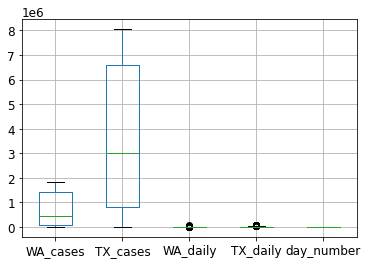

In [34]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f2bffac50>,
      dtype=object)

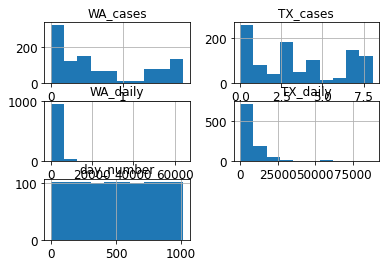

In [35]:
data.hist()

### Part 2: Write a summary of what you find from the data